follow this tutorial: https://www.analyticsvidhya.com/blog/2021/06/vader-for-sentiment-analysis/

In [1]:
# ! pip install flair
# ! pip install emoji
# ! pip install vaderSentiment
# ! pip install nltk

In [1]:
import pandas as pd
import numpy as np

import re
import string
import emoji

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk
import nltk.corpus
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# # nltk.download('wordnet')
# # nltk.download('punkt')
# # nltk.download('average_perception_tagger')
# # nltk.download('wordnet')
# # nltk.download('words') # if its needed

# import spacy
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English 
# nlp = English()

# from collections import Counter, defaultdict
# import matplotlib.pyplot as plt
# import numpy as np

In [113]:
tweet_data = pd.read_csv('data_lg_clean.csv')
tweet_data = tweet_data.dropna()
tweet_data.head()

/var/folders/87/clmyfqwn0kz2jfcyp0cbjycc0000gn/T/ipykernel_4309/721015313.py:1: DtypeWarning: Columns (0,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_data = pd.read_csv('data_lg_clean.csv')


,tweet_id,created_at,tweet,like_count,quote_count,reply_count,retweet_count,clean,hashtags,clean_spacy
0,1551734038204923904,2022-07-26 00:59:59+00:00,$2.7 billion for climate change (slashing carb...,15.0,1.0,0,6,27 billion for climate change slashing carbon ...,[],27 billion climate change slash carbon emissio...
1,1551734021591269377,2022-07-26 00:59:55+00:00,@nathaliejacoby1 Climate change. The rise in t...,2.0,0.0,0,0,climate change the rise in temperature will be...,[],climate change rise temperature bad secondary ...
2,1551734013815029761,2022-07-26 00:59:53+00:00,@JacobsVegasLife @LasVegasLocally This is a ch...,8.0,0.0,1,0,this is a chilling podcast about what could ha...,[],chill podcast happen salt lake city great salt...
3,1551733993740980224,2022-07-26 00:59:48+00:00,Climate Change and Energy Minister Chris Bowen...,18.0,0.0,8,5,climate change and energy minister chris bowen...,[],climate change energy minister chris bowen hit...
4,1551733979316887554,2022-07-26 00:59:45+00:00,"@Thebs15800518 At 5:30, @SecGranHolm tries to ...",0.0,0.0,0,0,at 530 tries to hide the fact that began signi...,"['#biden', '#oil', '#buildbackbetter']",530 try hide fact begin sign legislation shut ...


In [6]:
# text = tweet_data['clean_spacy'][10]
# text

In [7]:
# from nltk.tokenize import word_tokenize
# token = word_tokenize(text)
# token

In [8]:
# from nltk.probability import FreqDist
# fdist = FreqDist(token)
# fdist

In [9]:
# fdist.most_common(10)

In [10]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

In [11]:
# # importing stopwords from nltk library
# from nltk import word_tokenize
# from nltk.corpus import stopwords
# a = set(stopwords.words('english'))
# # text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
# text1 = word_tokenize(text.lower())
# print(text1)
# stopwords = [x for x in text1 if x not in a]
# print(stopwords)

In [12]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [13]:
sentiment_scores(tweet_data['clean_spacy'][9])

{'neg': 0.158, 'neu': 0.727, 'pos': 0.115, 'compound': -0.1779}

In [20]:
tweet_data['tmp'] = tweet_data['tweet'].apply(lambda x: sentiment_scores(x))
tweet_data['neg'] = tweet_data['tmp'].apply(lambda x: x['neg'])
tweet_data['pos'] = tweet_data['tmp'].apply(lambda x: x['pos'])
tweet_data['neu'] = tweet_data['tmp'].apply(lambda x: x['neu'])
tweet_data['compound'] = tweet_data['tmp'].apply(lambda x: x['compound'])

In [15]:
tweet_data["sentiment"] = np.select([tweet_data["compound"] < -0.05, (tweet_data["compound"] < 0.05) & (tweet_data["compound"] > -0.05), tweet_data["compound"] > 0.05],
                           ['neg', 'neu', 'pos'])

In [3]:
tweet_data = tweet_data[tweet_data['created_at']!='0']
tweet_data['created_at'] = pd.to_datetime(tweet_data['created_at'], format="%Y-%m-%d %H:%M:%S")
tweet_data = tweet_data.set_index('created_at')

In [21]:
pos_df = tweet_data[tweet_data['sentiment']=='pos']
neg_df = tweet_data[tweet_data['sentiment']=='neg']
neu_df = tweet_data[tweet_data['sentiment']=='neu']

In [22]:
pos = pos_df.resample('D').agg('count')['tweet']
neg = neg_df.resample('D').agg('count')['tweet']
neu = neu_df.resample('D').agg('count')['tweet']

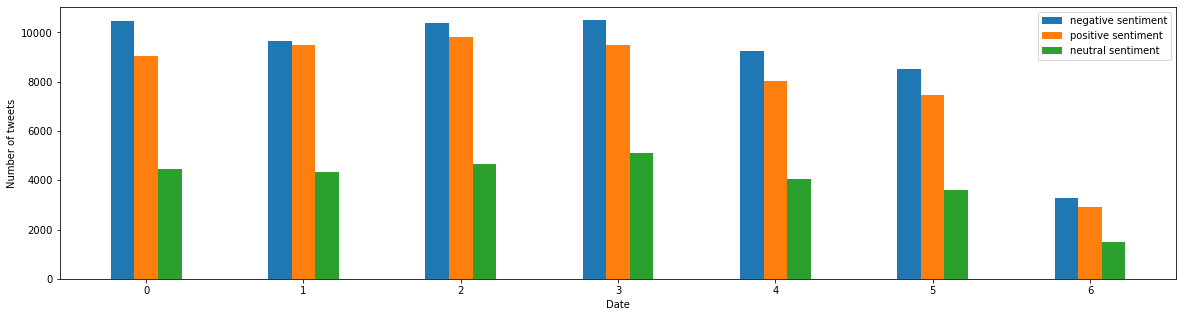

In [23]:
import matplotlib.pyplot as plt
width = 0.3
plt.bar(np.arange(len(neg))-width/2, neg, width=width/2,label='negative sentiment')
plt.bar(np.arange(len(pos)), pos, width=width/2, label='positive sentiment')
plt.bar(np.arange(len(neu))+width/2, neu, width=width/2, label='neutral sentiment')
plt.legend()
plt.ylabel('Number of tweets')
plt.xlabel('Date')
plt.gcf().set_size_inches(20,5)

In [37]:
tweet_data.to_csv('data_lg_clean_sentiment.csv')